In [1]:
import sys
import os
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)
print("Project root added:", project_root)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

from src.analysis.data_loader import load_oil_data
from src.analysis.change_point_model import bayesian_change_point

plt.style.use("seaborn-v0_8")
print("Imports OK")


Project root added: c:\Users\Kifiya_Administrator\Desktop\brent-oil-change-point-analysis\brent-oil-change-point-analysis


c:\Users\Kifiya_Administrator\Desktop\brent-oil-change-point-analysis\brent-oil-change-point-analysis\venv\Lib\site-packages\arviz\__init__.py:50: FutureWarning: 
ArviZ is undergoing a major refactor to improve flexibility and extensibility while maintaining a user-friendly interface.
Some upcoming changes may be backward incompatible.
For details and migration guidance, visit: https://python.arviz.org/en/latest/user_guide/migration_guide.html
  warn(
WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


Imports OK


In [2]:
df = load_oil_data("../data/raw/BrentOilPrices.csv")
df.head()


c:\Users\Kifiya_Administrator\Desktop\brent-oil-change-point-analysis\brent-oil-change-point-analysis\src\analysis\data_loader.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [3]:
price_series = df["Price"].values
print("Number of data points:", len(price_series))


Number of data points: 9011


In [4]:
model, trace = bayesian_change_point(price_series)


NameError: name 'price_series' is not defined

In [4]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import pymc as pm

# Add project root to sys.path to find src modules (if needed later)
project_root = os.path.abspath("..")
if project_root not in sys.path:
    sys.path.append(project_root)

plt.style.use("seaborn-v0_8")
print("Imports OK ✅")

# Paths to CSV files
brent_path = "../data/raw/BrentOilPrices.csv"
events_path = "../data/events/oil_market_events.csv"


Imports OK ✅


In [5]:
# Load Brent Oil Prices
df = pd.read_csv(brent_path)
df["Date"] = pd.to_datetime(df["Date"])
print("Brent Oil Prices:")
print(df.head())

# Load Oil Market Events
events = pd.read_csv(events_path)
events["date"] = pd.to_datetime(events["date"])
print("\nOil Market Events:")
print(events.head())


Brent Oil Prices:
        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63

Oil Market Events:
        date                                 event
0 2011-02-15               Libyan Civil War begins
1 2014-11-27  OPEC decision to maintain production
2 2016-01-16                 Iran sanctions lifted
3 2016-11-30         OPEC production cut agreement
4 2018-05-08   US withdraws from Iran nuclear deal


C:\Users\Kifiya_Administrator\AppData\Local\Temp\ipykernel_2812\1019862215.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


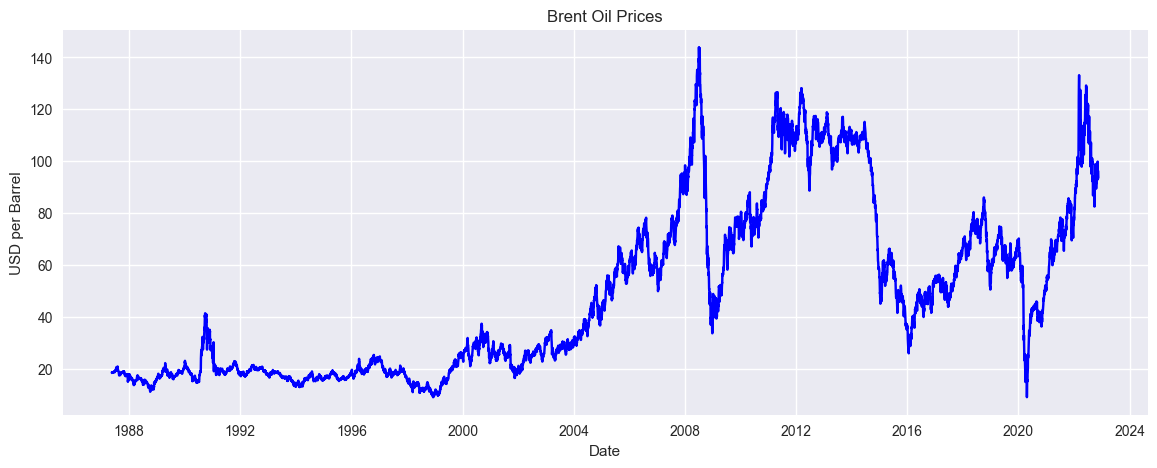

In [6]:
plt.figure(figsize=(14,5))
plt.plot(df["Date"], df["Price"], color="blue")
plt.title("Brent Oil Prices")
plt.xlabel("Date")
plt.ylabel("USD per Barrel")
plt.show()


In [7]:
def bayesian_change_point(price_series):
    n = len(price_series)
    
    with pm.Model() as model:
        # Switch point (tau)
        tau = pm.DiscreteUniform("tau", lower=0, upper=n-1)
        
        # Means before and after change
        mu1 = pm.Normal("mu1", mu=np.mean(price_series), sigma=np.std(price_series))
        mu2 = pm.Normal("mu2", mu=np.mean(price_series), sigma=np.std(price_series))
        
        # Standard deviation
        sigma = pm.HalfNormal("sigma", sigma=np.std(price_series))
        
        # Mean depending on tau
        mu = pm.math.switch(tau >= np.arange(n), mu1, mu2)
        
        # Likelihood
        obs = pm.Normal("obs", mu=mu, sigma=sigma, observed=price_series)
        
        # Sample posterior
        trace = pm.sample(2000, tune=1000, target_accept=0.95, cores=1, random_seed=42)
    
    return model, trace


In [3]:
import pandas as pd

# Load Brent oil prices
df = pd.read_csv("../data/raw/BrentOilPrices.csv")
df["Date"] = pd.to_datetime(df["Date"])
print("Brent prices loaded:")
print(df.head())

# Load events
events = pd.read_csv("../data/events/oil_market_events.csv")
events["date"] = pd.to_datetime(events["date"])
print("\nOil market events loaded:")
print(events.head())


Brent prices loaded:
        Date  Price
0 1987-05-20  18.63
1 1987-05-21  18.45
2 1987-05-22  18.55
3 1987-05-25  18.60
4 1987-05-26  18.63

Oil market events loaded:
        date                                 event
0 2011-02-15               Libyan Civil War begins
1 2014-11-27  OPEC decision to maintain production
2 2016-01-16                 Iran sanctions lifted
3 2016-11-30         OPEC production cut agreement
4 2018-05-08   US withdraws from Iran nuclear deal


C:\Users\Kifiya_Administrator\AppData\Local\Temp\ipykernel_18404\170964743.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


In [6]:
price_series = df["Price"].values
model, trace = bayesian_change_point(price_series)


NameError: name 'bayesian_change_point' is not defined